In [13]:
from dataloaders.classication_dataset import get_data_loaders as get_classif_data_loaders
from dataloaders.segmentation_dataset import get_data_loaders as get_seg_data_loaders

from architectures.classifiers import SimpleCNN, VGG16Binary, ResNet18Binary, SqueezeNetBinary
from architectures.segmenters import Unet

from training_algorithms.classification_training import train_classification_model as train_classif_model
from training_algorithms.segmentation_training import train_segmentation_model

import utils.utils as utils
from utils.gradcamplpl import gradcamplpl_mask

import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PIL import Image

if not torch.cuda.is_available():
    raise RuntimeError("GPU is not available, good luck.")
for i in range(torch.cuda.device_count()):
   print(f"'cuda:{i}' is: {torch.cuda.get_device_properties(i).name}")
cuda_device = "cuda:1"

# Seed to ensure train val test are split the same way for classification and segmentation dataloaders
split_seed = 777

'cuda:0' is: Quadro RTX 6000
'cuda:1' is: Quadro RTX 6000
'cuda:2' is: Quadro RTX 6000


In [14]:
classif_model = ResNet18Binary()
dataset = "PANNUKE0"
classif_train_loader, classif_val_loader, classif_test_loader = get_classif_data_loaders(
    img_dir=f"data/{dataset}/images",
    label_file=f"data/{dataset}/labels/labels.npy",
    contiguous_ids_file=f"data/{dataset}/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=16,
    val_split=0.2,
    test_split=0.1
)

Training for epoch 0: 100%|██████████| 90/90 [00:10<00:00,  8.58it/s]


Epoch 1/1000
Train loss: 0.6877672791481018
Val loss: 0.5691541039281421


Training for epoch 1: 100%|██████████| 90/90 [00:09<00:00,  9.15it/s]


Epoch 2/1000
Train loss: 0.5303930732938978
Val loss: 0.5366251120964686


Training for epoch 2: 100%|██████████| 90/90 [00:09<00:00,  9.00it/s]


Epoch 3/1000
Train loss: 0.5422233333190282
Val loss: 0.5862739258342319
No progress on best val loss (0.5366251120964686) was made, patience reduced to 4.


Training for epoch 3: 100%|██████████| 90/90 [00:09<00:00,  9.42it/s]


Epoch 4/1000
Train loss: 0.5252185930808385
Val loss: 0.5134496476915148


Training for epoch 4: 100%|██████████| 90/90 [00:10<00:00,  8.80it/s]


Epoch 5/1000
Train loss: 0.517947479751375
Val loss: 0.5072801464133793


Training for epoch 5: 100%|██████████| 90/90 [00:09<00:00,  9.16it/s]


Epoch 6/1000
Train loss: 0.4743558395240042
Val loss: 0.5358520289262135
No progress on best val loss (0.5072801464133793) was made, patience reduced to 4.


Training for epoch 6: 100%|██████████| 90/90 [00:09<00:00,  9.16it/s]


Epoch 7/1000
Train loss: 0.4449615461958779
Val loss: 0.6652442928817537
No progress on best val loss (0.5072801464133793) was made, patience reduced to 3.


Training for epoch 7: 100%|██████████| 90/90 [00:10<00:00,  8.66it/s]


Epoch 8/1000
Train loss: 0.47178390042649376
Val loss: 0.617472493979666
No progress on best val loss (0.5072801464133793) was made, patience reduced to 2.


Training for epoch 8: 100%|██████████| 90/90 [00:09<00:00,  9.95it/s]


Epoch 9/1000
Train loss: 0.4597137858470281
Val loss: 0.5942720300621457
No progress on best val loss (0.5072801464133793) was made, patience reduced to 1.


Training for epoch 9: 100%|██████████| 90/90 [00:09<00:00,  9.25it/s]


Epoch 10/1000
Train loss: 0.4644604899817043
Val loss: 0.5048422581619687
Progress on best val loss (0.5072801464133793) was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 0.0001.


Training for epoch 10: 100%|██████████| 90/90 [00:10<00:00,  8.98it/s]


Epoch 11/1000
Train loss: 0.4225924155778355
Val loss: 0.5011731780237622
Progress on best val loss (0.5048422581619687) was inferior to 0.005, patience reduced to 4.


Training for epoch 11: 100%|██████████| 90/90 [00:09<00:00,  9.10it/s]


Epoch 12/1000
Train loss: 0.3892126523786121
Val loss: 0.4714601950512992


Training for epoch 12: 100%|██████████| 90/90 [00:10<00:00,  8.93it/s]


Epoch 13/1000
Train loss: 0.37799676375256647
Val loss: 0.5179760684569676
No progress on best val loss (0.4714601950512992) was made, patience reduced to 4.


Training for epoch 14:  77%|███████▋  | 69/90 [00:07<00:02,  9.40it/s]


Epoch 14/1000
Train loss: 0.37111430052253935
Val loss: 0.5055413607094023
No progress on best val loss (0.4714601950512992) was made, patience reduced to 3.


Training for epoch 14: 100%|██████████| 90/90 [00:09<00:00,  9.03it/s]


Epoch 15/1000
Train loss: 0.3411892785794205
Val loss: 0.514508687125312
No progress on best val loss (0.4714601950512992) was made, patience reduced to 2.


Training for epoch 15: 100%|██████████| 90/90 [00:09<00:00,  9.20it/s]


Epoch 16/1000
Train loss: 0.3128096732828352
Val loss: 0.4956105765369203
No progress on best val loss (0.4714601950512992) was made, patience reduced to 1.


Training for epoch 16: 100%|██████████| 90/90 [00:10<00:00,  8.49it/s]


Epoch 17/1000
Train loss: 0.3162224831680457
Val loss: 0.5145062122080061
No progress on best val loss (0.4714601950512992) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1e-05.


Training for epoch 17: 100%|██████████| 90/90 [00:09<00:00,  9.57it/s]


Epoch 18/1000
Train loss: 0.2692439609103733
Val loss: 0.515343780650033
No progress on best val loss (0.4714601950512992) was made, patience reduced to 4.


Training for epoch 18: 100%|██████████| 90/90 [00:10<00:00,  8.72it/s]


Epoch 19/1000
Train loss: 0.29734710396991837
Val loss: 0.5178140944904751
No progress on best val loss (0.4714601950512992) was made, patience reduced to 3.


Training for epoch 19: 100%|██████████| 90/90 [00:09<00:00,  9.24it/s]


Epoch 20/1000
Train loss: 0.28028340041637423
Val loss: 0.5128773033618927
No progress on best val loss (0.4714601950512992) was made, patience reduced to 2.


Training for epoch 20: 100%|██████████| 90/90 [00:10<00:00,  8.66it/s]


Epoch 21/1000
Train loss: 0.28406393304467203
Val loss: 0.5186356923646397
No progress on best val loss (0.4714601950512992) was made, patience reduced to 1.


Training for epoch 21: 100%|██████████| 90/90 [00:10<00:00,  8.95it/s]


Epoch 22/1000
Train loss: 0.277621751320031
Val loss: 0.5318044622739156
No progress on best val loss (0.4714601950512992) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1.0000000000000002e-06.


Training for epoch 22: 100%|██████████| 90/90 [00:10<00:00,  8.89it/s]


Epoch 23/1000
Train loss: 0.2830314918110768
Val loss: 0.5073875579569075
No progress on best val loss (0.4714601950512992) was made, patience reduced to 4.


Training for epoch 23: 100%|██████████| 90/90 [00:10<00:00,  8.98it/s]


Epoch 24/1000
Train loss: 0.27446394976642396
Val loss: 0.5403290304872724
No progress on best val loss (0.4714601950512992) was made, patience reduced to 3.


Training for epoch 24: 100%|██████████| 90/90 [00:09<00:00,  9.22it/s]


Epoch 25/1000
Train loss: 0.25817971838017306
Val loss: 0.5394359178013272
No progress on best val loss (0.4714601950512992) was made, patience reduced to 2.


Training for epoch 25: 100%|██████████| 90/90 [00:10<00:00,  8.95it/s]


Epoch 26/1000
Train loss: 0.2645218892229928
Val loss: 0.5428069015343984
No progress on best val loss (0.4714601950512992) was made, patience reduced to 1.


Training for epoch 26: 100%|██████████| 90/90 [00:09<00:00,  9.24it/s]


Epoch 27/1000
Train loss: 0.2721725823978583
Val loss: 0.5341607020960913
No progress on best val loss (0.4714601950512992) was made, patience reduced to 0.
Best val loss: 0.4714601950512992 at epoch 11
Stopping training.


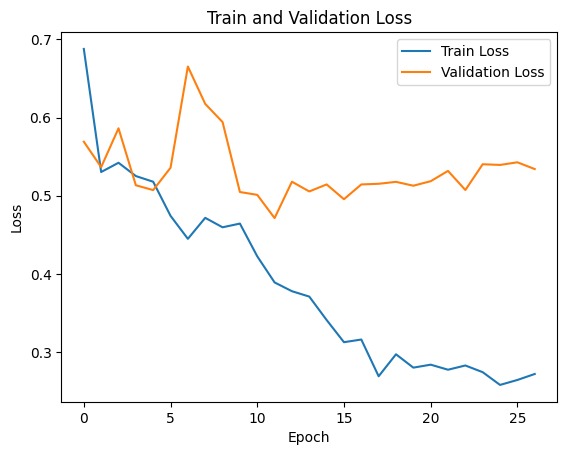

In [15]:
train_classif_model(classif_model, classif_train_loader, classif_val_loader, cuda_device, model_save_path=f"models/{dataset}/resnet", learning_rate=0.001)

In [4]:
trained_model_path = f"models/{dataset}/resnet_24"
classif_model = ResNet18Binary()
classif_model.load_state_dict(torch.load(trained_model_path, map_location=torch.device(cuda_device), weights_only=False))
classif_model.eval()
classif_model.to(torch.device(cuda_device))

ResNet18Binary(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

Accuracy on test set: 87.00%


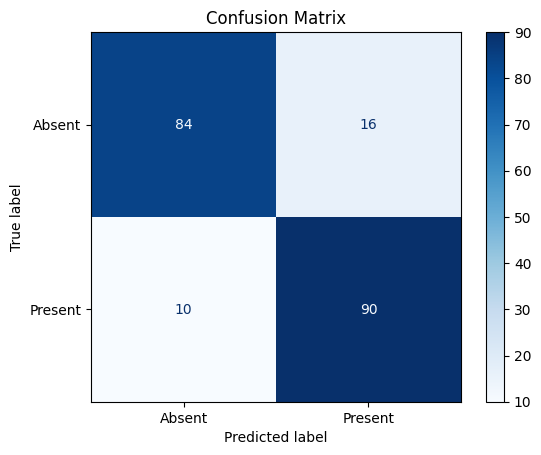

In [5]:
classif_model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
device = torch.device(cuda_device)
all_predictions = []
all_labels = []
all_inputs_tensors = []

    
# Disabling gradient calculation for evaluation
with torch.no_grad():
    for inputs, labels, _ in classif_test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = classif_model(inputs)

        # Get predicted class (the one with the highest score)
        _, predicted = torch.max(outputs, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_labels.append(labels.cpu().numpy())
        all_predictions.append(predicted.cpu().numpy())
        all_inputs_tensors.append(inputs.cpu().numpy())

# Flatten the lists to arrays
all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)
all_inputs_tensors = np.concatenate(all_inputs_tensors)

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

cm = confusion_matrix(all_labels, all_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Absent', 'Present'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [6]:
# Get the ids of all the images
img_names = os.listdir(f"data/{dataset}/images")
all_ids = set()
for name in img_names:
    # The images should be named like 1.npy
    digit = name.split('.')[0]
    # Check the name of the file is a digit because sometimes config files are hidden in folders (if not don't use)
    if digit.isdigit():
        all_ids.add(int(digit))

In [7]:
# target_layer = classif_model.conv6 # for simple CNN
target_layer = classif_model.resnet.layer4 # for resnet
# target_layer = classif_model.features[-1] # for vgg
grad_maps = []

for _id in tqdm(all_ids):
    img_path = f"data/{dataset}/images/{_id}.png"
    path_map = f"CAM_outputs/grayscale_maps/{_id}.npy"
    grayscale_map = gradcamplpl_mask(classif_model, target_layer, img_path, cuda_device)
    np.save(path_map, grayscale_map)

100%|██████████| 2000/2000 [47:06<00:00,  1.41s/it] 


In [8]:
# Now, we can generate centroids from the heatmap. The assumption is that those centroids are on the target cells.
for _id in all_ids:
    grayscale_map = np.load(f"CAM_outputs/grayscale_maps/{_id}.npy")
    centroid_map = utils.get_centroids(grayscale_map)
    path_centroid_map = f"CAM_outputs/centroid_maps/{_id}.npy"
    np.save(path_centroid_map, centroid_map)

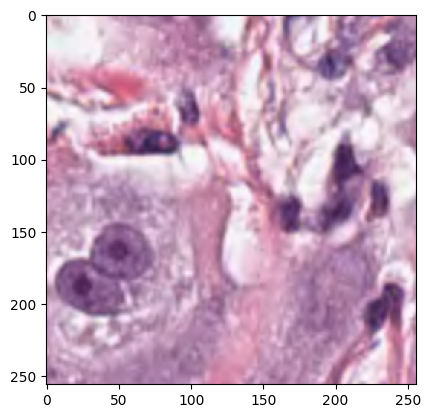

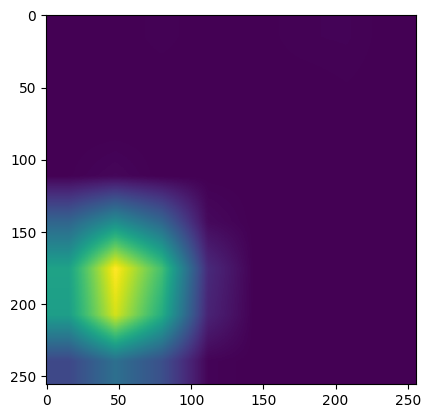

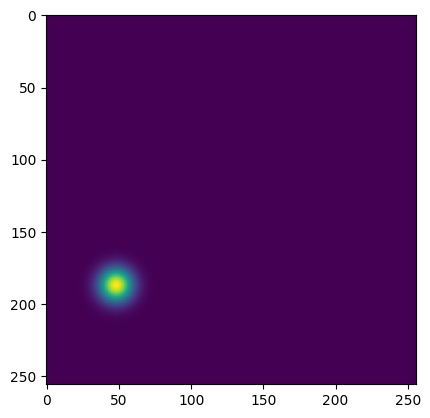

In [10]:
plt.imshow(Image.open(f"data/PANNUKE/images/{0}.png").convert('RGB'))
plt.show()
plt.imshow(np.load(f"CAM_outputs/grayscale_maps/{0}.npy"))
plt.show()
plt.imshow(np.load(f"CAM_outputs/centroid_maps/{0}.npy"))
plt.show()

In [3]:
seg_model = Unet()
seg_train_loader, seg_val_loader, seg_test_loader = get_seg_data_loaders(
    img_dir="data/PANNUKE/images",
    mask_dir="data/PANNUKE/masks",
    contiguous_ids_file="data/PANNUKE/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=16,
    val_split=0.2,
    test_split=0.1
)

In [4]:
train_seg_model(seg_model, seg_train_loader, seg_val_loader, cuda_device, learning_rate=0.001)

Training for epoch 0:  54%|█████▍    | 49/90 [00:23<00:19,  2.09it/s]


KeyboardInterrupt: 